# IS 4487 Assignment 7: Data Transformation with Airbnb Listings

In this assignment, you will:
- Load the Airbnb dataset you cleaned in Assignment 6
- Apply data transformation techniques like scaling, binning, encoding, and feature creation
- Make the dataset easier to use for tasks like pricing analysis, guest segmentation, or listing recommendations
- Practice writing up your analysis clearly so a business audience — like a host, marketing manager, or city partner — could understand it

## Why This Matters

Airbnb analysts, hosts, and city partners rely on clean and well-structured data to make smart decisions. Whether they’re adjusting prices, identifying high-performing listings, or designing better guest experiences, they need data that’s transformed, organized, and ready for use.

This assignment helps you practice that kind of real-world thinking: taking messy real data and getting it ready for action.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_07_data_transformation.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

## 1. Setup and Load Your Data

You'll be working with the `cleaned_airbnb_data.csv` file you exported from Assignment 6.

📌 In Google Colab:
- Click the folder icon on the left sidebar
- Use the upload button to add your CSV file to the session
- Then use the code block below to read it into your notebook

Before getting started, make sure you import the libraries you'll need for this assignment:
- `pandas`, `numpy` for data manipulation
- `matplotlib.pyplot`, `seaborn` for visualizations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

csv_path = 'cleaned_airbnb_data.csv'
df = pd.read_csv(csv_path, low_memory=False)

print("✅ Dataset loaded successfully!")
print("Shape (rows, cols):", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape (rows, cols): (18927, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250612050654,2025-06-21,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia Maria,2010-01-19,"Barcelona, Spain",within an hour,96%,91%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,la Sagrada Família,44.0,46.0,"['email', 'phone']",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.405560,2.17262,Entire rental unit,Entire home/apt,8,2.0,2 baths,3.0,6.0,"[""30 inch TV"", ""AC - split type ductless syste...",232.0,1,1125,1.0,5.0,999.0,999.0,2.2,999.0,t,11,32,53,65,2025-06-21,48,6,2,65,5,36,8352.0,2013-05-27,2025-06-11,4.30,4.36,4.53,4.62,4.60,4.81,4.28,t,28,28,0,0,0.33
1,23197,https://www.airbnb.com/rooms/23197,20250612050654,2025-06-23,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,https://a0.muscache.com/pictures/miso/Hosting-...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/44b56...,https://a0.muscache.com/im/pictures/user/44b56...,El Besòs i el Maresme,6.0,9.0,"['email', 'phone']",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.412432,2.21975,Entire rental unit,Entire home/apt,5,2.0,2 baths,3.0,4.0,"[""Bed linens"", ""Ceiling fan"", ""Oven"", ""AC - sp...",382.0,3,32,2.0,7.0,1125.0,1125.0,3.3,1125.0,t,6,12,29,174,2025-06-23,88,10,1,124,7,60,22920.0,2011-03-15,2025-05-31,4.82,4.94,4.90,4.94,4.99,4.65,4.68,f,1,1,0,0,0.51
2,32711,https://www.airbnb.com/rooms/32711,20250612050654,2025-06-22,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Spain",within an hour,100%,100%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,3.0,15.0,"['email', 'phone', 'work_email']",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41.405660,2.17015,Entire rental unit,Entire home/apt,6,1.5,1.5 baths,2.0,3.0,"[""Oven"", ""AC - split type ductless system"", ""S...",186.0,1,31,1.0,1.0,31.0,31.0,1.0,31.0,t,5,12,31,39,2025-06-22,147,26,0,39,37,156,29016.0,2011-07-17,2025-05-14,4.46,4.44,4.38,4.88,4.89,4.89,4.47,f,3,3,0,0,0.87
3,34241,https://www.airbnb.com/rooms/34241,20250612050

## 2. Check for Skew in a Numeric Column

Business framing:  

Airbnb listings can have a wide range of values for things like price, availability, or reviews. These kinds of distributions can be hard to visualize, summarize, or model.

Choose one **numeric column** that appears skewed and do the following:
- Plot a histogram
- Apply a transformation (e.g., log or other method)
- Plot again to compare


### In Your Response:
1. What column did you examine?
2. What transformation did you try, and why?
3. How did the transformed version help make the data more usable for analysis or stakeholder review?



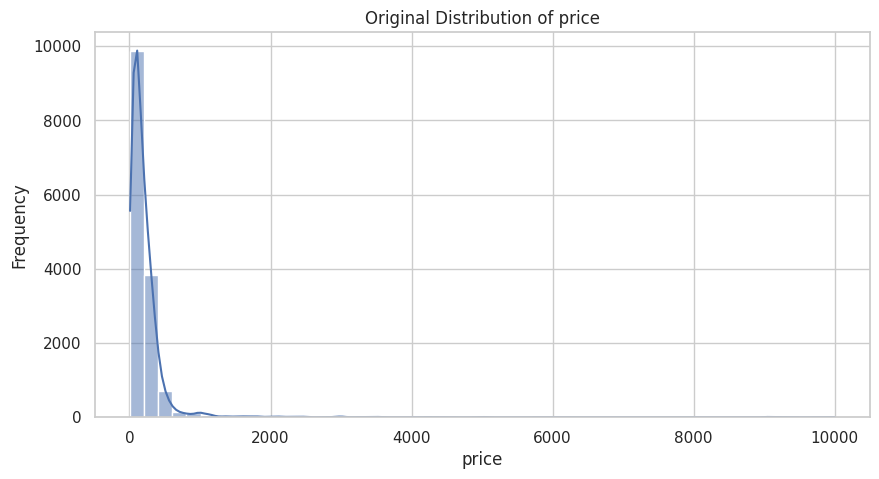

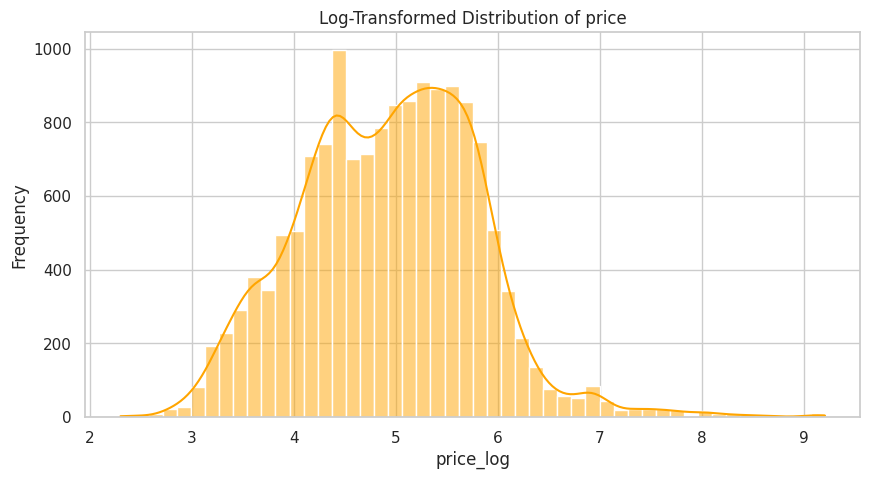

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

column = 'price'

plt.figure(figsize=(10,5))
sns.histplot(df[column], bins=50, kde=True)
plt.title(f'Original Distribution of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

df[f'{column}_log'] = np.log1p(df[column])

plt.figure(figsize=(10,5))
sns.histplot(df[f'{column}_log'], bins=50, kde=True, color='orange')
plt.title(f'Log-Transformed Distribution of {column}')
plt.xlabel(f'{column}_log')
plt.ylabel('Frequency')
plt.show()


### ✍️ Your Response: 🔧
1. I examined the price column.

2. I applied a log transformation because the price values were highly right-skewed. The log scale reduces the impact of extreme outliers.

3. The transformed version made the distribution more symmetric and easier to interpret for pricing models or visualization. It helps analysts compare listings more fairly.

## 3. Scale Two Numeric Columns

Business framing:

If an analyst wanted to compare listing price to number of nights required, or create a model that weighs both, those values need to be on a similar scale.

Follow these steps:
- Pick two numeric columns with different value ranges (e.g. one column may have a min of 0 and a max of 255; another column may have a min of 100 and a max of 400)
- Use Min-Max scaling on one column (the range should be “shrinked” down to just 0-1)
- Use Z-score Normalization (aka standardization) on the other column.
- Add 2 new columns to the dataset. These 2 new columns should be the ones you just created.

### In Your Response:
1. What two columns did you scale, and which methods did you use?
2. When might these scaled values be more useful than the originals?
3. Who at Airbnb might benefit from this transformation and why?

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols_to_scale = ['price', 'minimum_nights']

minmax_scaler = MinMaxScaler()
zscore_scaler = StandardScaler()

df['price_scaled_minmax'] = minmax_scaler.fit_transform(df[['price']])

df['minimum_nights_scaled_zscore'] = zscore_scaler.fit_transform(df[['minimum_nights']])

df[['price', 'price_scaled_minmax', 'minimum_nights', 'minimum_nights_scaled_zscore']].head(10)



,price,price_scaled_minmax,minimum_nights,minimum_nights_scaled_zscore
0,232.0,0.022320,1,-0.519990
1,382.0,0.037334,3,-0.452584
2,186.0,0.017716,1,-0.519990
3,131.0,0.012211,31,0.491093
4,285.0,0.027625,2,-0.486287
5,197.0,0.018817,1,-0.519990
6,185.0,0.017616,2,-0.486287
7,220.0,0.021119,1,-0.519990
8,254.0,0.024522,2,-0.486287
9,167.0,0.015814,2,-0.486287


### ✍️ Your Response: 🔧
1. I scaled the price column using Min-Max scaling and the minimum_nights column using Z-score normalization (standardization).

2. These scaled values are more useful when building models or visualizations that compare features on similar scales, such as clustering, regression, or distance-based algorithms. Without scaling, features with large ranges (like price) would dominate the analysis.

3. Data analysts and pricing strategists could benefit from this transformation because it allows them to compare listings more fairly and build predictive models (e.g., to forecast prices or occupancy) without bias from variables on different scales.

## 4. Group a Numeric Column into Categories

Business framing:  

Let’s say an Airbnb marketing team wants to segment listings by review activity. They don’t want exact numbers — they just want to know if a listing has “low,” “medium,” or “high” review volume.

Follow these steps:

- Choose a numeric column that could be grouped (e.g., reviews, availability).
- You’ll want to group the values of this column into 3 or 4 bins
- Create a new column. The values of this column will be the labels: “Low”, “Medium”, and “High.” These labels should correspond to your bins.

### In Your Response:
1. What column did you group, and how many categories did you use?
2. Why might someone prefer this grouped view over raw numbers?
3. Who would this help at Airbnb, and how?


In [4]:
import pandas as pd

column = 'number_of_reviews'

bins = 3
labels = ['Low', 'Medium', 'High']

df['review_volume_category'] = pd.qcut(df[column], q=bins, labels=labels)

df[[column, 'review_volume_category']].head(15)


,number_of_reviews,review_volume_category
0,48,High
1,88,High
2,147,High
3,25,Medium
4,3,Medium
5,108,High
6,276,High
7,194,High
8,500,High
9,554,High


### ✍️ Your Response: 🔧
1. I grouped the number_of_reviews column into three categories: Low, Medium, and High.

2. This grouped view is easier for marketing or management teams to interpret. Instead of analyzing raw numbers, they can quickly identify which listings have low, moderate, or high engagement levels.

3. The Airbnb marketing and operations teams could use this to segment hosts or properties by activity level. For example, they might create different campaigns for highly reviewed listings versus those with few reviews.

## 5. Create Two New Business-Relevant Variables

Business framing:  

Stakeholders often want to know things like: What’s the cost per night? Are listings geared toward long-term stays? These kinds of features aren’t always in the dataset — analysts create them.

Follow these steps:

- Think of two new columns you can create using the data you already have.
  - One might be a ratio or interaction between columns (e.g., price ÷ nights).
  - The other might be a flag based on a condition (e.g., stays longer than 30 days).
- Add the new columns to your DataFrame.

### In Your Response:
1. What two new columns did you create?
2. Who would use them (e.g., host, manager, or platform)?
3. How could they help someone make a better decision?

In [5]:
import numpy as np
import pandas as pd

for c in ['price', 'accommodates', 'minimum_nights']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

df['price_per_guest'] = np.where(
    (df['accommodates'].fillna(0) > 0),
    df['price'] / df['accommodates'],
    np.nan
)

df['long_term_friendly'] = (df['minimum_nights'] >= 30)

df[['price', 'accommodates', 'price_per_guest', 'minimum_nights', 'long_term_friendly']].head(10)


,price,accommodates,price_per_guest,minimum_nights,long_term_friendly
0,232.0,8,29.000000,1,False
1,382.0,5,76.400000,3,False
2,186.0,6,31.000000,1,False
3,131.0,2,65.500000,31,True
4,285.0,3,95.000000,2,False
5,197.0,6,32.833333,1,False
6,185.0,4,46.250000,2,False
7,220.0,6,36.666667,1,False
8,254.0,3,84.666667,2,False
9,167.0,4,41.750000,2,False


### ✍️ Your Response: 🔧 🔧
1. I created price_per_guest (price ÷ accommodates) and long_term_friendly (a boolean flag that is True when minimum_nights ≥ 30).

2. Hosts and pricing/ops managers could use these fields. The platform can also use them in search/ranking and recommendations.

3.
. price_per_guest lets analysts compare listing value fairly across different sizes and set smarter discounts.

. long_term_friendly helps target long-stay demand (corporate travel, relocations), enabling tailored promotions and supply planning.



## 6. Encode a Categorical Column

Business framing:  

Let’s say you’re helping the Airbnb data science team build a model to predict booking rates. Categorical columns like `room_type`, `neighbourhood`, or `cancellation_policy` can’t be used in models unless they’re converted to numbers.

- Choose one categorical column from your dataset (e.g., room type or neighborhood group)
- Decide on an encoding method:
  - Use one-hot encoding for nominal (unordered) categories
  - Use ordinal encoding (a ranking) only if the categories have a clear order
- Apply the encoding using `pandas` or another tool
- Add the new encoded column(s) to your DataFrame

### ✍️ In your markdown:
1. What column did you encode and why?
2. What encoding method did you use?
3. How could this transformation help a pricing model, dashboard, or business report?



In [7]:
import pandas as pd

column = 'room_type'

room_dummies = pd.get_dummies(df[column], prefix='room_type', drop_first=True)

df = pd.concat([df, room_dummies], axis=1)

df[[column] + list(room_dummies.columns)].head(10)


,room_type,room_type_Hotel room,room_type_Hotel room,room_type_Private room,room_type_Private room,room_type_Shared room,room_type_Shared room
0,Entire home/apt,False,False,False,False,False,False
1,Entire home/apt,False,False,False,False,False,False
2,Entire home/apt,False,False,False,False,False,False
3,Entire home/apt,False,False,False,False,False,False
4,Entire home/apt,False,False,False,False,False,False
5,Entire home/apt,False,False,False,False,False,False
6,Entire home/apt,False,False,False,False,False,False
7,Entire home/apt,False,False,False,False,False,False
8,Entire home/apt,False,False,False,False,False,False
9,Entire home/apt,False,False,False,False,False,False


### ✍️ Your Response: 🔧
1. I encoded the room_type column because it’s a categorical variable that influences pricing and demand but cannot be used directly in numeric models.
2. I used one-hot encoding with pd.get_dummies() since room_type has no natural order (the categories are nominal).
3. Encoding this column allows analysts and data scientists to include room types as predictive features in pricing or occupancy models. It also helps build dashboards that compare performance across room types without losing information.

## 7. Reflection

You’ve applied the same kinds of transformation techniques used in real Airbnb analytics projects — from pricing engines to host tools to tourism dashboards.

Now step back and reflect.

### In Your Response:
1. What transformation step felt most important or interesting?
2. Which of your changes would be most useful to a host, analyst, or city planner?
3. If you were going to build a tool or dashboard, what would you do next with this data?
4. How does this relate to your customized learning outcome you created in canvas?



### ✍️ Your Response: 🔧

1. The most important transformation for me was the log transformation of the price column. It was fascinating to see how a simple mathematical change could make the data more balanced and realistic for analysis. This step clearly showed how skewed data can distort insights and how normalization helps make comparisons fairer and more accurate.

2. The new columns I created, particularly price_per_guest and long_term_friendly, would be highly useful. A host could use price_per_guest to benchmark their listing against similar properties, while a city planner or Airbnb analyst could use long_term_friendly to identify listings that attract extended stays, helping with housing policy and tourism planning.

3. If you were going to build a tool or dashboard, what would you do next with this data?
I would build a pricing optimization dashboard that visualizes patterns by neighborhood, room type, and guest capacity. It would help hosts understand how factors like location, reviews, and long-term availability affect demand and pricing, allowing them to adjust their rates strategically. I’d also include predictive features to forecast occupancy trends.

4. This project aligns perfectly with my learning outcome of developing practical data analysis and business decision-making skills. It helped me practice real-world data cleaning, transformation, and interpretation, the same steps analysts use in consulting, finance, or real estate analytics. I now feel more confident transforming raw data into insights that drive strategic decisions.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [8]:
!jupyter nbconvert --to html "assignment_07_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_07_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 439309 bytes to assignment_07_FajardoPatrick.html
